# Plots Comparing Different Policy Ranking Methods

In [2]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
grad_norm_correlation_loc = "data/grad_norm_ipw_spearman_corrs_16_06_2022.pkl"
snip_correlation_loc = "data/snip_spearman_corr_16_06_2022.pkl"
jacob_cov_correlation_loc = "data/jacob_cov_spearman_corr_16_06_2022.pkl"
synflow_correlation_loc = "data/synflow_spearman_corr_16_06_2022.pkl"

ipw_correlation_loc = "data/ipw_spearman_corrs_14_06_2022.pkl"
snipw_correlation_loc = "data/snipw_spearman_corr_14_06_2022.pkl"

with open(grad_norm_correlation_loc, "rb") as f:
    grad_norm_corr = pickle.load(f)

with open(snip_correlation_loc, "rb") as f:
    snip_corr = pickle.load(f)

with open(jacob_cov_correlation_loc, "rb") as f:
    jacob_cov_corr = pickle.load(f)

with open(synflow_correlation_loc, "rb") as f:
    synflow_corr = pickle.load(f)

with open(ipw_correlation_loc, "rb") as f:
    ipw_corr = pickle.load(f)

with open(snipw_correlation_loc, "rb") as f:
    snipw_corr = pickle.load(f)

## Spearman Correlation Across all Zones

In [4]:
grad_norm_abs = [abs(val.correlation) for val in grad_norm_corr.values()]
snip_abs = [abs(val.correlation) for val in snip_corr.values()]
jacob_cov_abs = [abs(val.correlation) for val in jacob_cov_corr.values()]
synflow_abs = [abs(val.correlation) for val in synflow_corr.values()]

ipw_abs = [abs(val.correlation) for val in ipw_corr.values()]
snipw_abs = [abs(val.correlation) for val in snipw_corr.values()]

grad_norm_df = pd.DataFrame()
grad_norm_df["method"] = ["NAS: Grad-Norm" for i in range(len(grad_norm_abs))]
grad_norm_df["correlation"] = grad_norm_abs

snip_df = pd.DataFrame()
snip_df["method"] = ["NAS: SNIP" for i in range(len(snip_abs))]
snip_df["correlation"] = snip_abs

jacob_cov_df = pd.DataFrame()
jacob_cov_df["method"] = ["NAS: Jacob-Cov" for i in range(len(jacob_cov_abs))]
jacob_cov_df["correlation"] = jacob_cov_abs

synflow_df = pd.DataFrame()
synflow_df["method"] = ["NAS: Synflow" for i in range(len(synflow_abs))]
synflow_df["correlation"] = synflow_abs

ipw_df = pd.DataFrame()
ipw_df["method"] = ["OPE: IPW" for i in range(len(ipw_abs))]
ipw_df["correlation"] = ipw_abs

snipw_df = pd.DataFrame()
snipw_df["method"] = ["OPE: SNIPW" for i in range(len(snipw_abs))]
snipw_df["correlation"] = snipw_abs

boxplot_df = pd.concat([grad_norm_df, snip_df, jacob_cov_df,
                        synflow_df, ipw_df, snipw_df])

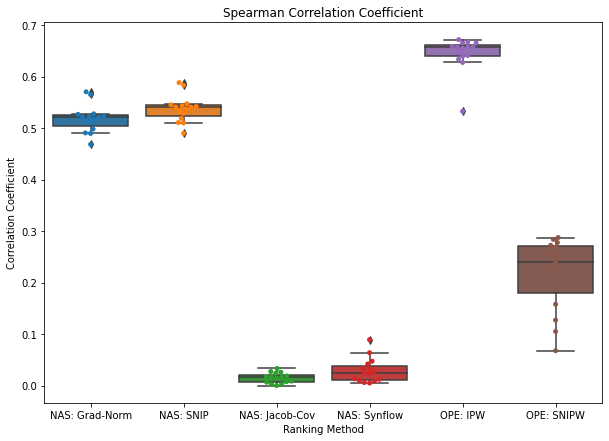

In [7]:
plt.figure(figsize=(10, 7))
plt.title("Spearman Correlation Coefficient")
sns.boxplot(x="method", y="correlation", data=boxplot_df)
sns.swarmplot(x="method", y="correlation", data=boxplot_df)
plt.xlabel("Ranking Method")
plt.ylabel("Correlation Coefficient")
plt.savefig("plots/spearman_corr_boxplot_17_06_2022.png", dpi=300)